In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
heart=pd.read_csv("heart.csv")
heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder


enc=LabelEncoder()
heart["Sex"]= enc.fit_transform(heart["Sex"])
heart["ChestPainType"]= enc.fit_transform(heart["ChestPainType"])
heart["RestingECG"]= enc.fit_transform(heart["RestingECG"])
heart["ST_Slope"]= enc.fit_transform(heart["ST_Slope"])
heart["ExerciseAngina"] = enc.fit_transform(heart["ExerciseAngina"])





heart.head(100)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,1,0,130,263,0,1,140,1,2.0,1,1
96,43,1,1,142,207,0,1,138,0,0.0,2,0
97,39,1,2,160,147,1,1,160,0,0.0,2,0
98,56,1,0,120,85,0,1,140,0,0.0,2,0


In [ ]:
heart['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [ ]:
heart_corr=heart.corr()
heart_corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: title={'center': 'Correlation Matrix\n'}>

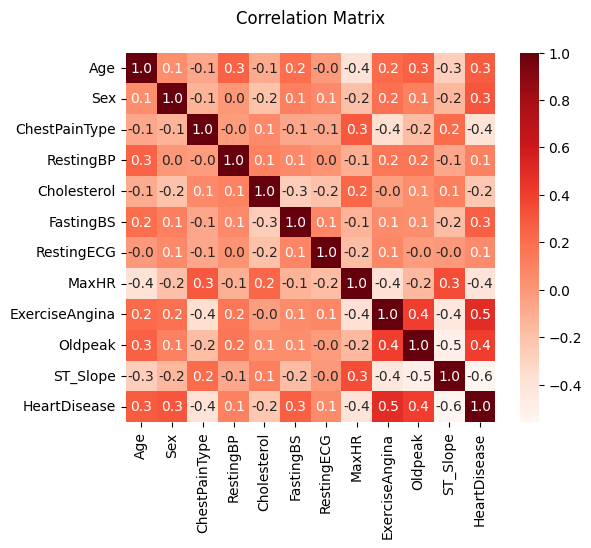

In [ ]:
plt.title("Correlation Matrix\n")
sns.heatmap(heart_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<Axes: title={'center': 'Correlation Matrix\n'}>

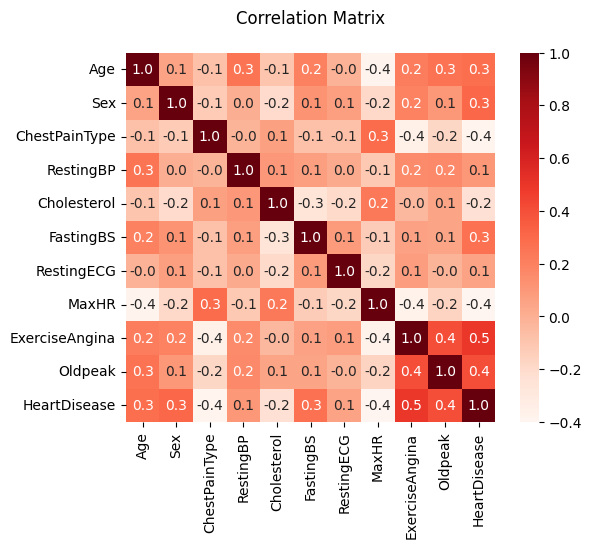

In [ ]:
heart=heart.drop(['ST_Slope'],axis=1)
heart_corr=heart.corr()
plt.title("Correlation Matrix\n")
sns.heatmap(heart_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [ ]:

x=heart.drop(['HeartDisease'],axis=1)

y=heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)
prediction1=log.predict(X_test)
accuracy1=accuracy_score(y_test, prediction1)
precision1 = precision_score(y_test, prediction1)
recall1 = recall_score(y_test, prediction1)

In [ ]:
print(f'Accuracy: {accuracy1*100:.2f}%')
print(f"Precision: {precision1*100:.2f}%")
print(f"Recall: {recall1*100:.2f}%")

Accuracy: 80.43%
Precision: 87.79%
Recall: 75.16%


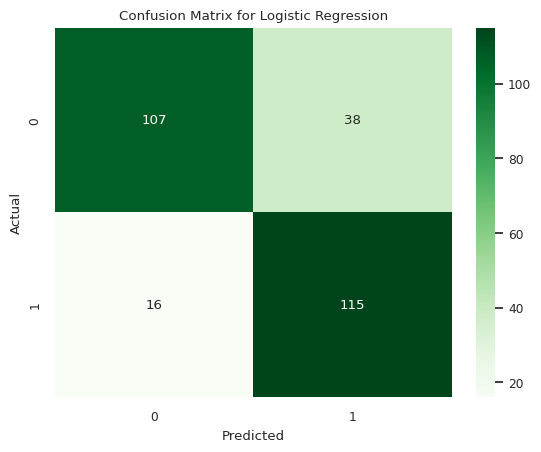

In [ ]:
from sklearn.metrics import confusion_matrix
mat1=confusion_matrix(prediction1, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat1, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()